### Prerequisites

#### Install Libraries

In [ ]:
!pip install textworld ; \
cd /usr/local/lib/python3.7/dist-packages/ && \
rm -rf Diploma_Temp -v ; \
rm -rf textworld/Created_Games -v ; \
rm -rf textworld/MyPy -v ; \
git clone https://github.com/AthanasiosPetsanis/Diploma_Temp  && \
mv Diploma_Temp/TextWorld/Created_Games textworld/ -v && \
mv Diploma_Temp/TextWorld/MyPy textworld/ -v

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.7 MB 8.1 MB/s 
     |████████████████████████████████| 85 kB 4.2 MB/s 
     |████████████████████████████████| 1.2 MB 62.9 MB/s 
  Created wheel for jericho: filename=jericho-3.1.0-py3-none-any.whl size=333859 sha256=9c555c583df7acea4c945659ff9129f6641dd2ed05c3aff0b6a023272437c561
  Stored in directory: /root/.cache/pip/wheels/38/3f/1e/b279c7bb3ec04ceeb150611eb9c2eed35c7eb150132d14d4ac
Successfully built jericho
Cloning into 'Diploma_Temp'...
remote: Enumerating objects: 511, done.
remote: Counting objects: 100% (295/295), done.
remote: Compressing objects: 100% (220/220), done.
remote: Total 511 (delta 89), reused 261 (delta 75), pack-reused 216
Receiving objects: 100% (511/511), 1.21 MiB | 4.67 MiB/s, done.
Resolving deltas: 100% (171/171), done.
renamed 'Diploma_Temp/TextWorld/Created_Games' -> 'textworld/Created_Games'
renamed 'Diploma_Temp/Te

#### Import Libraries

In [ ]:
# This imports all the necessary libraries from inside Q_agent.py
from textworld.MyPy.Q_agent import *

### Params

In [ ]:
env_names = ['Easy', 'Easy_2', 'Medium', 'Medium_2', 'Hard']
algo = 'ppo'
graph_points = 250
frames = graph_points * 2048
recurrence = 8
action_courses = {}
user_inputs = {}

In [ ]:
envs = []
for env_name in env_names:
    envs.append('Sparse_' + env_name)
    envs.append('Dense_' + env_name)

user_inputs['Easy'] = ['apple', 'livingroom', 'table']
user_inputs['Easy_2'] = ['apple', 'livingroom', 'table']
user_inputs['Medium'] = ['apple', 'livingroom', 'table']
user_inputs['Medium_2'] = ['apple', 'livingroom', 'table']
user_inputs['Hard'] = ['apple', 'livingroom', 'table']

In [ ]:
print(action_courses)

{}


### TextWorld Training




                    ________  ________  __    __  ________        
                   |        \|        \|  \  |  \|        \       
                    \$$$$$$$$| $$$$$$$$| $$  | $$ \$$$$$$$$       
                      | $$   | $$__     \$$\/  $$   | $$          
                      | $$   | $$  \     >$$  $$    | $$          
                      | $$   | $$$$$    /  $$$$\    | $$          
                      | $$   | $$_____ |  $$ \$$\   | $$          
                      | $$   | $$     \| $$  | $$   | $$          
                       \$$    \$$$$$$$$ \$$   \$$    \$$          
              __       __   ______   _______   __        _______  
             |  \  _  |  \ /      \ |       \ |  \      |       \ 
             | $$ / \ | $$|  $$$$$$\| $$$$$$$\| $$      | $$$$$$$\
             | $$/  $\| $$| $$  | $$| $$__| $$| $$      | $$  | $$
             | $$  $$$\ $$| $$  | $$| $$    $$| $$      | $$  | $$
             | $$ $$\$$\$$| $$  | $$| $$$$$$$\| $$      | $

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


Training detected (3,) possible states
Number of commands for each state: 
[(1,), (2,), (1,)]


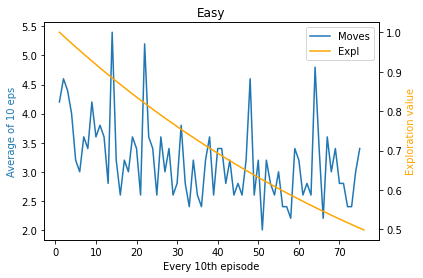

Training took 0.0 minutes and 38.330453634262085 seconds
S1: ['Livingroom', [], ['take apple']]
S2: ['Livingroom', ['apple.'], ['drop apple', 'put apple on table']]
S3: ['Livingroom', [], ['take apple from table']]
Action taken in step 1: take apple
Action taken in step 2: put apple on table
Finished in 2 moves
Actions taken:
take apple > put apple on table > 


                    ________  ________  __    __  ________        
                   |        \|        \|  \  |  \|        \       
                    \$$$$$$$$| $$$$$$$$| $$  | $$ \$$$$$$$$       
                      | $$   | $$__     \$$\/  $$   | $$          
                      | $$   | $$  \     >$$  $$    | $$          
                      | $$   | $$$$$    /  $$$$\    | $$          
                      | $$   | $$_____ |  $$ \$$\   | $$          
                      | $$   | $$     \| $$  | $$   | $$          
                       \$$    \$$$$$$$$ \$$   \$$    \$$          
              __       __   ____

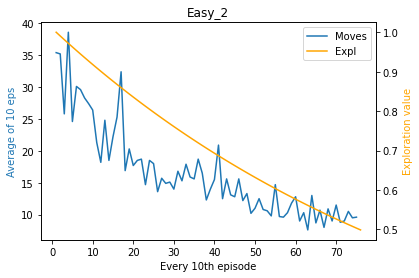

Training took 1.0 minutes and 24.847660303115845 seconds
S1: ['Livingroom', [], ['open door']]
S2: ['Livingroom', [], ['close door', 'go east']]
S3: ['Kitchen', [], ['close door', 'go west', 'take apple']]
S4: ['Kitchen', ['apple.'], ['close door', 'drop apple', 'go west']]
S5: ['Kitchen', ['apple.'], ['drop apple', 'open door']]
S6: ['Livingroom', ['apple.'], ['close door', 'drop apple', 'go east', 'put apple on table']]
S7: ['Livingroom', ['apple.'], ['drop apple', 'open door', 'put apple on table']]
S8: ['Livingroom', [], ['close door', 'go east', 'take apple from table']]
S9: ['Kitchen', [], ['open door', 'take apple']]
S10: ['Livingroom', [], ['close door', 'go east', 'take apple']]
S11: ['Livingroom', [], ['open door', 'take apple']]
S12: ['Kitchen', [], ['close door', 'go west']]
S13: ['Livingroom', [], ['open door', 'take apple from table']]
S14: ['Kitchen', [], ['open door']]
Action taken in step 1: open door
Action taken in step 2: go east
Action taken in step 3: take apple
A

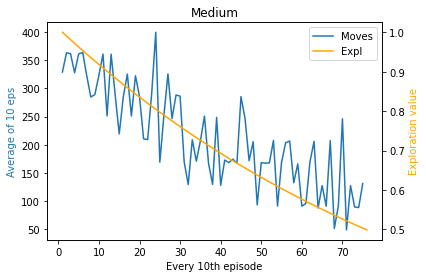

Training took 14.0 minutes and 13.193241596221924 seconds
S1: ['Livingroom', [], ['open door']]
S2: ['Livingroom', [], ['close door', 'go east']]
S3: ['Kitchen', [], ['close door', 'go west', 'open fridge']]
S4: ['Kitchen', [], ['open door', 'open fridge']]
S5: ['Kitchen', [], ['close door', 'close fridge', 'go west', 'take apple from fridge']]
S6: ['Kitchen', [], ['close fridge', 'open door', 'take apple from fridge']]
S7: ['Kitchen', ['apple.'], ['close door', 'close fridge', 'drop apple', 'eat apple', 'go west', 'insert apple into fridge']]
S8: ['Kitchen', [], ['close door', 'close fridge', 'go west']]
S9: ['Kitchen', [], ['close fridge', 'open door']]
S10: ['Kitchen', [], ['close door', 'close fridge', 'go west', 'take apple']]
S11: ['Kitchen', [], ['close door', 'go west', 'open fridge', 'take apple']]
S12: ['Kitchen', ['apple.'], ['close door', 'drop apple', 'eat apple', 'go west', 'open fridge']]
S13: ['Kitchen', ['apple.'], ['drop apple', 'eat apple', 'open door', 'open fridge'

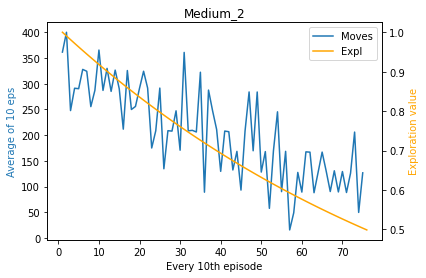

Training took 13.0 minutes and 35.76971960067749 seconds
S1: ['Livingroom', [], ['open door']]
S2: ['Livingroom', [], ['close door', 'go east']]
S3: ['Kitchen', [], ['close door', 'go west', 'open fridge']]
S4: ['Kitchen', [], ['close door', 'close fridge', 'go west', 'take apple from fridge']]
S5: ['Kitchen', [], ['close fridge', 'open door', 'take apple from fridge']]
S6: ['Kitchen', ['apple.'], ['close fridge', 'drop apple', 'eat apple', 'insert apple into fridge', 'open door']]
S7: ['Kitchen', ['apple.'], ['close door', 'close fridge', 'drop apple', 'eat apple', 'go west', 'insert apple into fridge']]
S8: ['Livingroom', ['apple.'], ['close door', 'drop apple', 'eat apple', 'go east', 'put apple on table']]
S9: ['Livingroom', ['apple.'], ['drop apple', 'eat apple', 'open door', 'put apple on table']]
S10: ['Livingroom', [], ['open door', 'take apple']]
S11: ['Livingroom', [], ['close door', 'go east', 'take apple from table']]
S12: ['Kitchen', [], ['open door', 'open fridge']]
S13: 

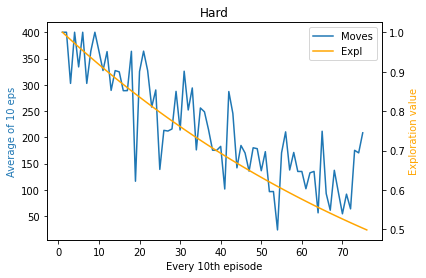

Training took 15.0 minutes and 6.024844169616699 seconds
S1: ['Livingroom', [], ['take key']]
S2: ['Livingroom', ['key.'], ['drop key', 'put key on table', 'unlock door with key']]
S3: ['Livingroom', [], ['take key from table']]
S4: ['Livingroom', ['key.'], ['drop key', 'lock door with key', 'open door', 'put key on table']]
S5: ['Livingroom', [], ['open door', 'take key']]
S6: ['Livingroom', [], ['close door', 'go east', 'take key']]
S7: ['Livingroom', ['key.'], ['close door', 'drop key', 'go east', 'put key on table']]
S8: ['Livingroom', [], ['close door', 'go east', 'take key from table']]
S9: ['Kitchen', [], ['close door', 'go west', 'open fridge']]
S10: ['Kitchen', [], ['open door', 'open fridge']]
S11: ['Kitchen', [], ['close door', 'close fridge', 'go west', 'take apple from fridge']]
S12: ['Kitchen', ['key.'], ['close door', 'close fridge', 'drop key', 'go west', 'insert key into fridge', 'take apple from fridge']]
S13: ['Kitchen', ['apple', 'and', 'key.'], ['close door', 'clos

In [ ]:
for env_name in env_names:
    
    # Load env
    game_file = '/usr/local/lib/python3.7/dist-packages/textworld/Created_Games/' + env_name + '.ulx'
    env, obs, infos = load_game(game_file=game_file)

    # Make agent
    agent = Q_agent(env)

    # Train
    agent.reset()
    agent.train(max_epochs=5, max_eps=150, title=env_name, min_expl=0.05, expl_decay_rate=0.001,
                    gamma=0.5, user_input=user_inputs[env_name], neg_reward=1)
    # agent.train(max_epochs=5, max_eps=100, title=env_name, min_expl=0.05, manual=True)

    # Test
    action_courses[env_name] = agent.test()

### Post TextWorld Process

In [ ]:
# !cd /usr/local/lib/python3.7/dist-packages/ && \
# rm -rf Diploma_Temp -v

!pip3 install gym-minigrid ; \
cd /usr/local/lib/python3.7/dist-packages/ && \
git clone https://github.com/lcswillems/rl-starter-files ; \
git clone https://github.com/lcswillems/torch-ac ; \
mv Diploma_Temp/MiniGrid/__init__.py gym_minigrid/envs/ -v ; \
mv Diploma_Temp/MiniGrid/MyEnvs.py gym_minigrid/envs/ -v ; \
mv Diploma_Temp/MiniGrid/minigrid.py gym_minigrid/ -v ; \
cd /usr/local/lib/python3.7/dist-packages/rl-starter-files/ && \
pip3 install -r requirements.txt ; \

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48 kB 2.6 MB/s 
Cloning into 'rl-starter-files'...
remote: Enumerating objects: 2651, done.
remote: Total 2651 (delta 0), reused 0 (delta 0), pack-reused 2651
Receiving objects: 100% (2651/2651), 28.08 MiB | 32.38 MiB/s, done.
Resolving deltas: 100% (1606/1606), done.
Cloning into 'torch-ac'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 93 (delta 33), reused 27 (delta 27), pack-reused 47
Unpacking objects: 100% (93/93), done.
renamed 'Diploma_Temp/MiniGrid/__init__.py' -> 'gym_minigrid/envs/__init__.py'
renamed 'Diploma_Temp/MiniGrid/MyEnvs.py' -> 'gym_minigrid/envs/MyEnvs.py'
renamed 'Diploma_Temp/MiniGrid/minigrid.py' -> 'gym_minigrid/minigrid.py'
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

In [ ]:
import pickle

def filter_actions(action_courses):
    rmv_actions = ['go east', 'go west', 'go north', 'go south']
    for action_course, actions_taken in action_courses.items():
        for sentence in actions_taken:
            if 'unlock' in sentence:
                action_courses[action_course].remove(sentence)
        action_courses[action_course] = list(filter(lambda action: action not in rmv_actions, actions_taken))
    return action_courses

def reset(envs):
    for env_name in envs:
        !cd /usr/local/lib/python3.7/dist-packages/rl-starter-files/storage && \
        rm -rf {env_name} -v

action_courses = filter_actions(action_courses)
print(action_courses)
# action_courses = {'Medium': ['open door', 'open fridge', 'take apple from fridge', 'put apple on table']}

with open('/usr/local/lib/python3.7/dist-packages/rl-starter-files/storage/action_courses', 'wb') as fp:
    pickle.dump(action_courses, fp)

### MiniGrid Training

Notice that the only connection with TextWorld and MiniGrid training are the produced decomposed actions a.k.a. the "action_courses" variable

In [ ]:
!cd /usr/local/lib/python3.7/dist-packages/gym_minigrid/envs/ && \
python3 MyEnvs.py

import time
reset(envs)
# envs = ['Dense_Hard']
for env_name in envs: 
    env_dir = 'MiniGrid-' + env_name + '-v0'
    !cd /usr/local/lib/python3.7/dist-packages/rl-starter-files/ && \
    python3 -m scripts.train --algo {algo} --env {env_dir} --frames {frames} --model {env_name} --recurrence {recurrence}


Traceback (most recent call last):
  File "MyEnvs.py", line 514, in <module>
    entry_point='gym_minigrid.envs.MyEnvs:Dense_Easy'
  File "/usr/local/lib/python3.7/dist-packages/gym_minigrid/register.py", line 11, in register
    assert id not in env_list
AssertionError
/usr/local/lib/python3.7/dist-packages/rl-starter-files/scripts/train.py --algo ppo --env MiniGrid-Sparse_Easy-v0 --frames 512000 --model Sparse_Easy --recurrence 8

Namespace(algo='ppo', batch_size=256, clip_eps=0.2, discount=0.99, entropy_coef=0.01, env='MiniGrid-Sparse_Easy-v0', epochs=4, frames=512000, frames_per_proc=None, gae_lambda=0.95, log_interval=1, lr=0.001, max_grad_norm=0.5, mem=True, model='Sparse_Easy', optim_alpha=0.99, optim_eps=1e-08, procs=16, recurrence=8, save_interval=10, seed=1, text=False, value_loss_coef=0.5)

Device: cpu

Environments loaded

Training status loaded

Observations preprocessor loaded
Model loaded

ACModel(
  (image_conv): Sequential(
    (0): Conv2d(3, 16, kernel_size=(2, 2), st

### Graphs

In [ ]:
import csv
import matplotlib.pyplot as plt

def data_extract(envs, data_label):

    storage_data = []
    new_dir_names = []
    
    for env_name in envs:
        file_name = '/usr/local/lib/python3.7/dist-packages/rl-starter-files/storage/' + env_name + '/log.csv'
        file = open(file_name)
        file = csv.reader(file)
        header = next(file)

        data = []
        for d in file:
            data.append(d)
        for i in range(len(header)):
            if header[i] == data_label: r_index = i

        data_hist = []
        for epoch in range(len(data)):
            sample = data[epoch][r_index]
            if sample != data_label:
                data_hist.append(round(float(sample), 5))
        
        storage_data.append(np.array(data_hist))
    return storage_data

data_rrmean = data_extract(envs, 'rreturn_mean')
data_rrstd = data_extract(envs, 'rreturn_std')
# data_rrmax = data_extract(envs, 'rreturn_max')
# data_rrmin = data_extract(envs, 'rreturn_min')


In [ ]:
print(np.shape(data_rrmean))
# print(np.shape(data_rrmax))
# print(np.shape(data_rrmin))
print(np.shape(data_rrstd))
print(type(data_rrstd[0]))
# print(data_rrstd[0])


(10, 250)
(10, 250)
<class 'numpy.ndarray'>


In [ ]:
# Simple Representation
def plotter(rrmean, rrstd):
    for i in np.arange(0,len(rrmean),2):

        # Find length of epochs (i.e. x-axis)
        x_len = np.shape(rrmean)[1]
        x = np.arange(0,x_len)

        # Find values of mean+std and mean-std for dense and sparse
        y_pos = np.add(rrmean[i], rrstd[i])
        y_neg = np.subtract(rrmean[i], rrstd[i])
        y_pos_ = np.add(rrmean[i+1], rrstd[i+1])
        y_neg_ = np.subtract(rrmean[i+1], rrstd[i+1])

        # Style properties
        fig = plt.figure(figsize=(6,4), edgecolor='black',dpi=100)
        title = env_names[int(i/2)]
        ax = fig.add_axes([0,0,1,1], projection='rectilinear',
        xlabel = 'Epochs',
        ylabel = 'Mean Episode Return', title=title, facecolor='w')
        plt.style.use('seaborn')

        # Plot for Dense with blue
        plt.plot(rrmean[i], color='r', label='Sparse Rewarding')
        plt.plot(y_pos, color='r', alpha=0.06)
        plt.plot(y_neg, color='r', alpha=0.06)
        plt.fill_between(x, y_pos, y_neg, color='r', alpha=0.4)

        # Plot for Sparse with red
        plt.plot(rrmean[i+1], color='b', label='Dense Rewarding')
        plt.plot(y_pos_, color='b', alpha=0.06)
        plt.plot(y_neg_, color='b', alpha=0.06)
        plt.fill_between(x, y_pos_, y_neg_, color='royalblue', alpha=0.4)

        plt.legend()

['Sparse_Easy', 'Dense_Easy', 'Sparse_Easy_2', 'Dense_Easy_2', 'Sparse_Medium', 'Dense_Medium', 'Sparse_Medium_2', 'Dense_Medium_2', 'Sparse_Hard', 'Dense_Hard']


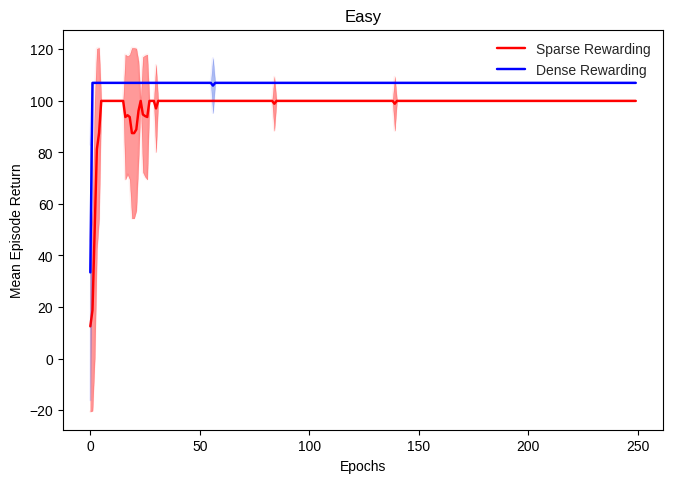

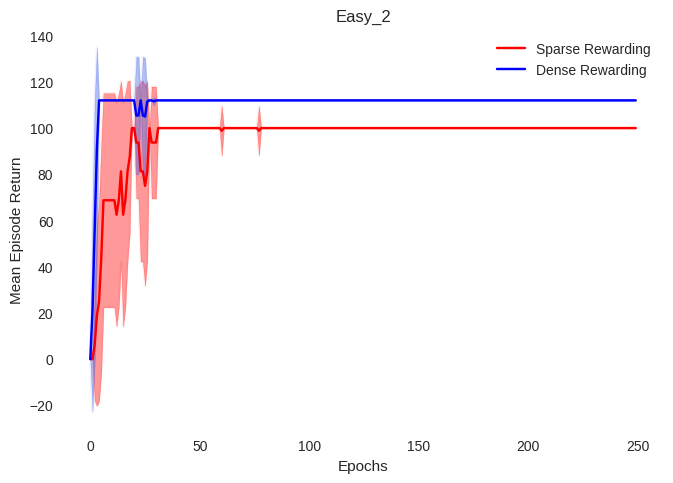

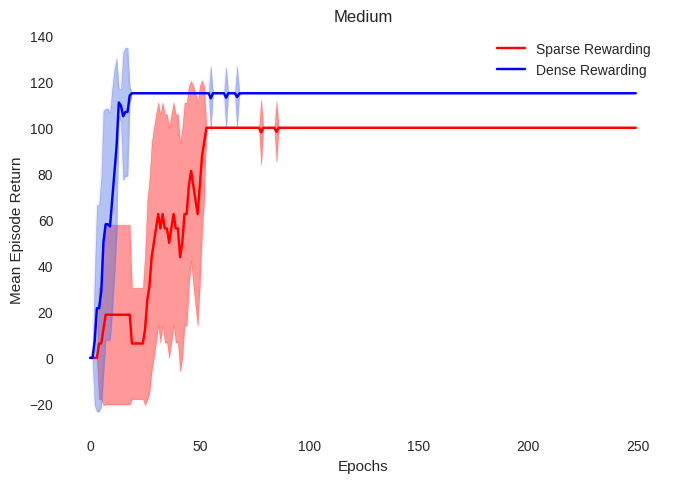

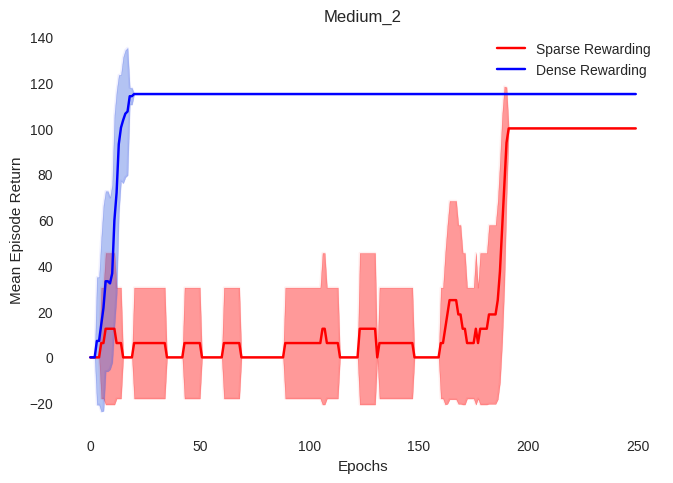

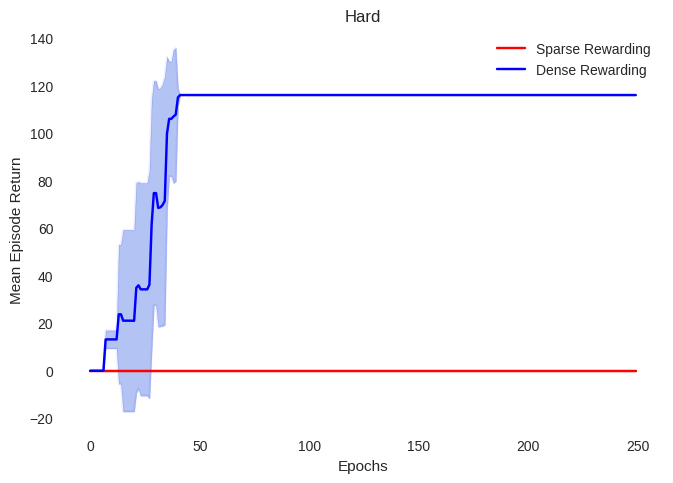

In [ ]:
# plotter(data_rrmean, data_rrmax, data_rrmin)
plotter(data_rrmean, data_rrstd)
print(envs)

In [ ]:
!cd /usr/local/lib/python3.7/dist-packages/rl-starter-files/storage/{env_name}/ && ls

events.out.tfevents.1657363301.bf479bdcdfb4  log.csv  log.txt  status.pt
